# Import data set

In [202]:
# Loan_ID : Unique Loan ID

# Gender : Male/ Female

# Married : Applicant married (Y/N)

# Dependents : Number of dependents

# Education : Applicant Education (Graduate/ Under Graduate)

# Self_Employed : Self employed (Y/N)

# ApplicantIncome : Applicant income

# CoapplicantIncome : Coapplicant income

# LoanAmount : Loan amount in thousands of dollars

# Loan_Amount_Term : Term of loan in months

# Credit_History : Credit history meets guidelines yes or no

# Property_Area : Urban/ Semi Urban/ Rural

# Loan_Status : Loan approved (Y/N) this is the target variable

### 1. Display Top 5 Rows of The Dataset

In [203]:
import pandas as pd
file = "loan.csv"

df = pd.read_csv(file)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Check Last 5 Rows of The Dataset

In [204]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [205]:
df.shape

(614, 13)

### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 5. Check Null Values In The Dataset

In [207]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 6. Handling The missing Values

In [208]:
percentage_null = (df.isnull().sum() / len(df)) * 100
print(percentage_null)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [209]:
#Drop Loan ID
df.drop(columns=['Loan_ID'], inplace=True)

In [210]:
#Remove the rows 5% missing data

#Self-Emplyed #Credit History
df.dropna(subset=['Gender','Married','Dependents','Education','LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'], inplace=True)




In [211]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [212]:
#Imputations
from sklearn.impute import SimpleImputer

In [213]:
imputer = SimpleImputer(strategy='most_frequent')


df[['Self_Employed']] = imputer.fit_transform(df[['Self_Employed']])
df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [214]:
imputer = SimpleImputer(strategy='most_frequent')

# Select the 'Self_Employed' column as a DataFrame (2D)
df_self_employed = df[['Credit_History']]

# Apply imputation
df['Credit_History'] = imputer.fit_transform(df_self_employed)

In [215]:
df['Credit_History'].value_counts()

Credit_History
1.0    482
0.0     71
Name: count, dtype: int64

In [216]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


### 7. Handling Categorical Columns

In [217]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0, "NaN":0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0, "NaN":0})
df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, "Rural":0})



df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,0,N
2,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,2,Y
3,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,Male,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,2,Y
5,Male,1,2,Graduate,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [218]:
#USe Replace
df['Education'] = df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1,'N':0})
df.head()

C:\Users\e1005282\AppData\Local\Temp\ipykernel_29524\876646707.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace({'Graduate':1,'Not Graduate':0})
C:\Users\e1005282\AppData\Local\Temp\ipykernel_29524\876646707.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
C:\Users\e1005282\AppData\Local\Temp\ipykernel_29524\876646707.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [219]:
df['Dependents'] = df['Dependents'].replace({'3+' : 4})

In [220]:
df['Dependents'] = df['Dependents'].astype('int')
df['Credit_History'] = df['Credit_History'].astype('int')

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int64  
 1   Married            553 non-null    int64  
 2   Dependents         553 non-null    int32  
 3   Education          553 non-null    int64  
 4   Self_Employed      553 non-null    int64  
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    int32  
 10  Property_Area      553 non-null    int64  
 11  Loan_Status        553 non-null    int64  
dtypes: float64(3), int32(2), int64(7)
memory usage: 51.8 KB


In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

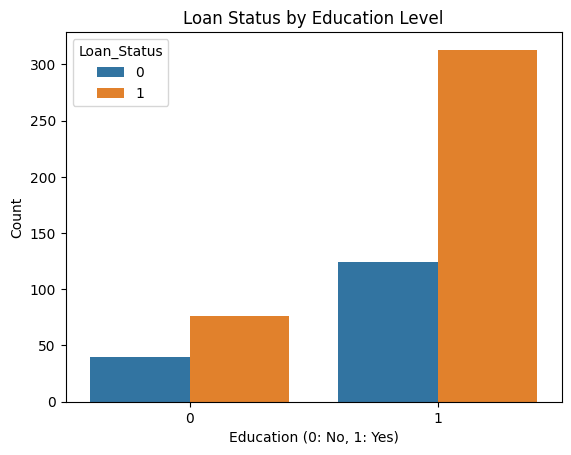

In [223]:
df.groupby(['Education','Loan_Status']).size().unstack()

sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.xlabel('Education (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Loan Status by Education Level')
plt.show()

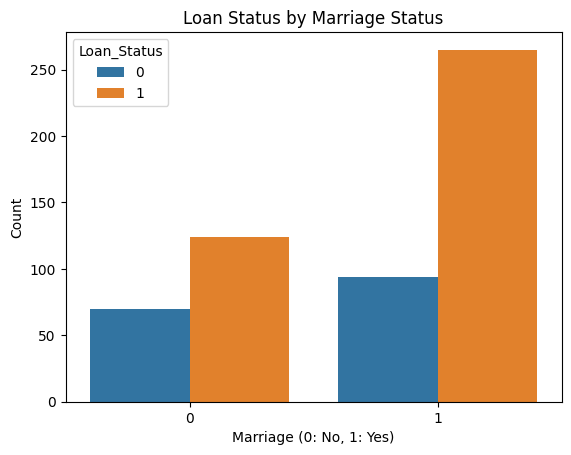

In [224]:
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.xlabel('Marriage (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Loan Status by Marriage Status')
plt.show()

In [225]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1,2,1


### 8. Store Feature In X And Response (Target)  y

In [226]:
X = df.drop(['Loan_Status'], axis=1)
Y = df[['Loan_Status']]
X['Dependents'].value_counts()

Dependents
0    316
1     96
2     96
4     45
Name: count, dtype: int64

In [227]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1,2,1


### 9. Feature Scaling

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [229]:
feature_scaled = scaler.fit_transform(X)
feature_scaled

array([[ 0.48127522,  0.73511222,  0.12748113, ...,  0.27996068,
         0.38380061, -1.30735908],
       [ 0.48127522,  0.73511222, -0.70189613, ...,  0.27996068,
         0.38380061,  1.25182525],
       [ 0.48127522,  0.73511222, -0.70189613, ...,  0.27996068,
         0.38380061,  1.25182525],
       ...,
       [ 0.48127522,  0.73511222,  0.12748113, ...,  0.27996068,
         0.38380061,  1.25182525],
       [ 0.48127522,  0.73511222,  0.9568584 , ...,  0.27996068,
         0.38380061,  1.25182525],
       [-2.0778132 , -1.36033653, -0.70189613, ...,  0.27996068,
        -2.6055196 , -0.02776692]])

In [230]:
from sklearn.model_selection import train_test_split

### 10. Splitting The Dataset Into The Training Set And Test Set 

In [231]:
X_train, X_test, y_train, y_test = train_test_split(feature_scaled,Y,test_size=0.5,random_state=42)

### 11. Logistic Regression

In [232]:
from sklearn.linear_model import LogisticRegression

In [233]:
model = LogisticRegression()
model.fit(X_train,y_train)

c:\Users\e1005282\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [234]:
predict = model.predict(X_test)


In [235]:
from sklearn.metrics import accuracy_score

In [236]:
accuracy = accuracy_score(y_test,predict)
print(f"Model accuracy:{accuracy:.2%}")

Model accuracy:81.59%


In [237]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

c:\Users\e1005282\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [240]:
y_pred = rf.predict(X_test)

In [241]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7833935018050542


<Axes: >

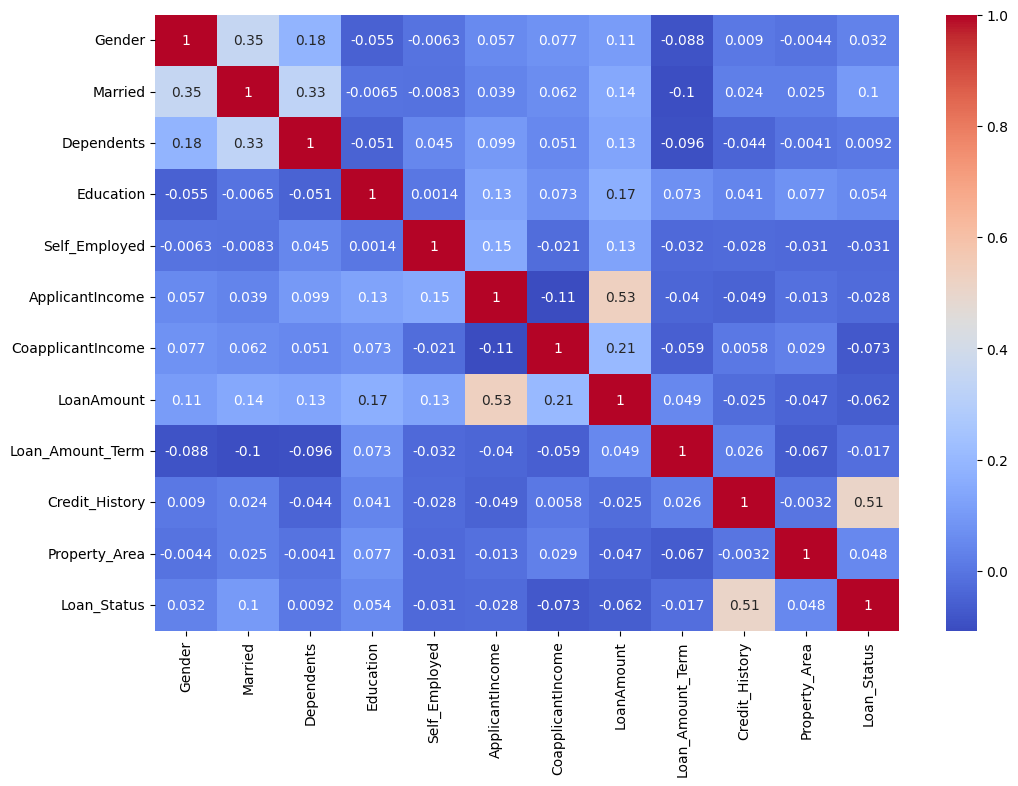

In [242]:

correlation_matrix =  df.corr()
 
import matplotlib.pyplot as plt
 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')